In [534]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.ticker as mt

In [535]:
df=pd.read_csv('survey_results_public.csv')

In [536]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### this code for selecting specific colmuns 

In [537]:
cols = [ 'EdLevel','LearnCodeOnline','LanguageAdmired','DatabaseAdmired','AIToolCurrently Using',
        'ConvertedCompYearly','AISelect','Country','DevType','PlatformAdmired','WebframeAdmired',
       'RemoteWork', 'YearsCodePro','YearsCode','JobSat','Age','Employment','LanguageHaveWorkedWith'
       ,'LanguageWantToWorkWith','LearnCode']
ind = df.columns.get_indexer(cols)
ind=sorted(ind)
df= df.iloc[:,ind]

In [538]:
df['LanguageWantToWorkWith'].head()

0                                                  NaN
1    Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                   C#
3    HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4                   C++;HTML/CSS;JavaScript;Lua;Python
Name: LanguageWantToWorkWith, dtype: object

### this code will make the region for top 10

In [539]:
top10_countries = df['Country'].value_counts(ascending=False).head(10).index.tolist()
df= df[df['Country'].isin(top10_countries)].copy()

In [540]:
df['Country']=df['Country'].replace(
          {'United Kingdom of Great Britain and Northern Ireland':'UK',
          'United States of America':'USA'}) 

### this code for employed ppl only

In [541]:
df = df[df['Employment'].str.contains('Employed', na=False)]

In [542]:
counts = df['Employment'].value_counts()
df = df[df['Employment'].isin(counts[counts > 52].index)]
df['Employment'].value_counts()

Employment
Employed, full-time                                                                             21579
Employed, full-time;Independent contractor, freelancer, or self-employed                         1755
Student, full-time;Employed, part-time                                                            632
Employed, part-time                                                                               614
Employed, full-time;Student, full-time                                                            500
Employed, full-time;Student, part-time                                                            425
Student, part-time;Employed, part-time                                                            271
Independent contractor, freelancer, or self-employed;Employed, part-time                          184
Employed, full-time;Employed, part-time                                                            78
Student, full-time;Independent contractor, freelancer, or self-employed

### this code will drop people who dont code

In [543]:
df=df.dropna(subset=['YearsCode'])

### this code will fill the null values in the annual salary 
annual salary is filled by the median for each country, based on years of exp

In [544]:
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(
    df.groupby(['Country', 'YearsCode'])['ConvertedCompYearly'].transform('median')
)

In [545]:
df['ConvertedCompYearly'].isnull().sum()

62

### this code will fill the rest of the nulls in the annual salary
it will fill it by the median for each country 

In [546]:
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(
    df.groupby('Country')['ConvertedCompYearly'].transform('median')
)


In [547]:
df['ConvertedCompYearly'].isnull().sum()

0

## Introduction Questions:

### 1. Check the survey’s accuracy and improve it

In [548]:
df.Age.describe()

count               26113
unique                  8
top       25-34 years old
freq                10781
Name: Age, dtype: object

In [549]:
df.Age.value_counts()

Age
25-34 years old       10781
35-44 years old        6873
18-24 years old        4100
45-54 years old        2818
55-64 years old        1213
65 years or older       165
Under 18 years old      121
Prefer not to say        42
Name: count, dtype: int64

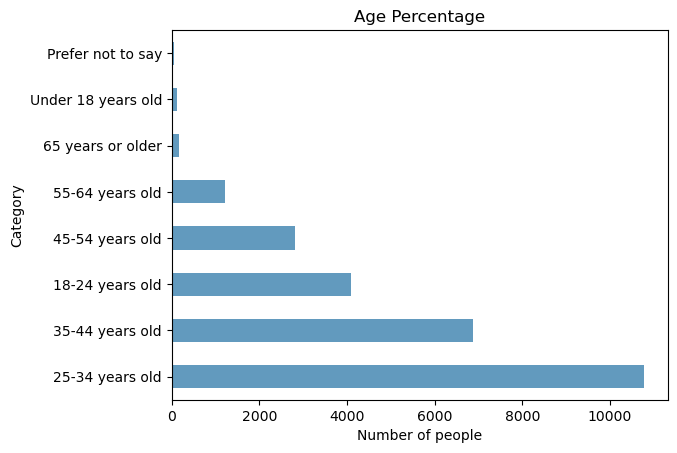

In [550]:
df.Age.value_counts().plot(kind='barh',color='#629abe');
plt.title('Age Percentage');
plt.ylabel('Category');
plt.xlabel('Number of people');

### Check `EdLevel` column for the top 10 country responses

In [551]:
df['EdLevel']=df['EdLevel'].replace(
          {'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':'Bachelor’s degree',
          'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':'Master’s degree',
          'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':'Professional degree',
          'Some college/university study without earning a degree':'Some College (No Degree)',
          'Associate degree (A.A., A.S., etc.)':'Associate degree',
          'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary school (or equivalent)'})

In [552]:
df.EdLevel.describe()

count                 26113
unique                    8
top       Bachelor’s degree
freq                  11834
Name: EdLevel, dtype: object

In [553]:
df.EdLevel.value_counts()

EdLevel
Bachelor’s degree                   11834
Master’s degree                      7844
Some College (No Degree)             2666
Professional degree                  1438
Secondary school (or equivalent)     1170
Associate degree                      797
Something else                        249
Primary/elementary school             115
Name: count, dtype: int64

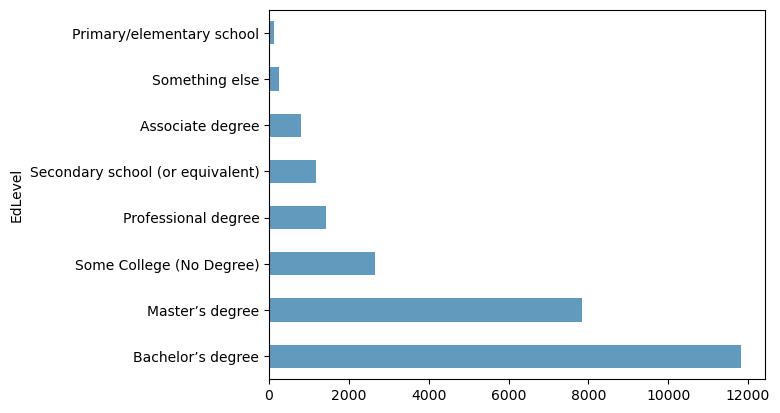

In [554]:
df.EdLevel.value_counts().plot(kind='barh',color='#629abe');

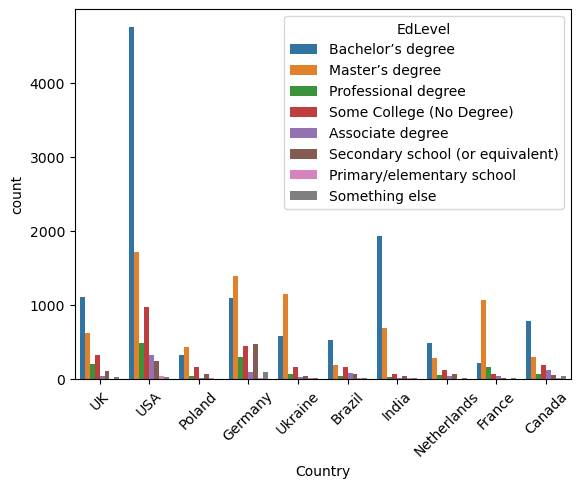

In [555]:
sns.countplot(data=df, x='Country', hue='EdLevel')#, order=top10.index)
plt.xticks(rotation=45);

### 2. Is there a relationship between what companies use and the programs people prefer?

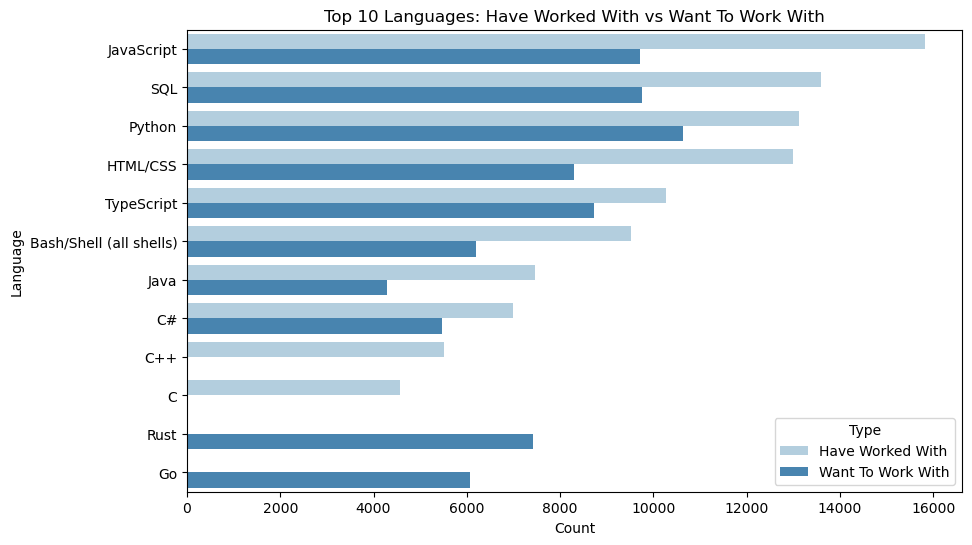

In [657]:
langs_have = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().head(10)
langs_want = df['LanguageWantToWorkWith'].str.split(';').explode().value_counts().head(10)

df_have = pd.DataFrame({'Language': langs_have.index, 'Count': langs_have.values, 'Type': 'Have Worked With'})
df_want = pd.DataFrame({'Language': langs_want.index, 'Count': langs_want.values, 'Type': 'Want To Work With'})

df_combined = pd.concat([df_have, df_want])

plt.figure(figsize=(10,6))
sns.barplot(data=df_combined, x='Count', y='Language', hue='Type',palette='Blues')
plt.title('Top 10 Languages: Have Worked With vs Want To Work With')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

### 3. Which sources are most used by peoples to learn coding?

In [559]:
learn_code = (
    df.dropna(subset=['LearnCode']).assign(learn_coding=df['LearnCode'].str.split(';')).explode('learn_coding')
)


In [560]:
learn_code['learn_coding']=learn_code['learn_coding'].replace(
          {'Other online resources (e.g., videos, blogs, forum, online community)':'Other online resources',
          'On the job training':'Training',
          'School (i.e., University, College, etc)':'School',
          'Friend or family member':'Friend/Family','Other (please specify):':'Other resources' })

In [621]:
lean_co=learn_code['learn_coding'].value_counts()

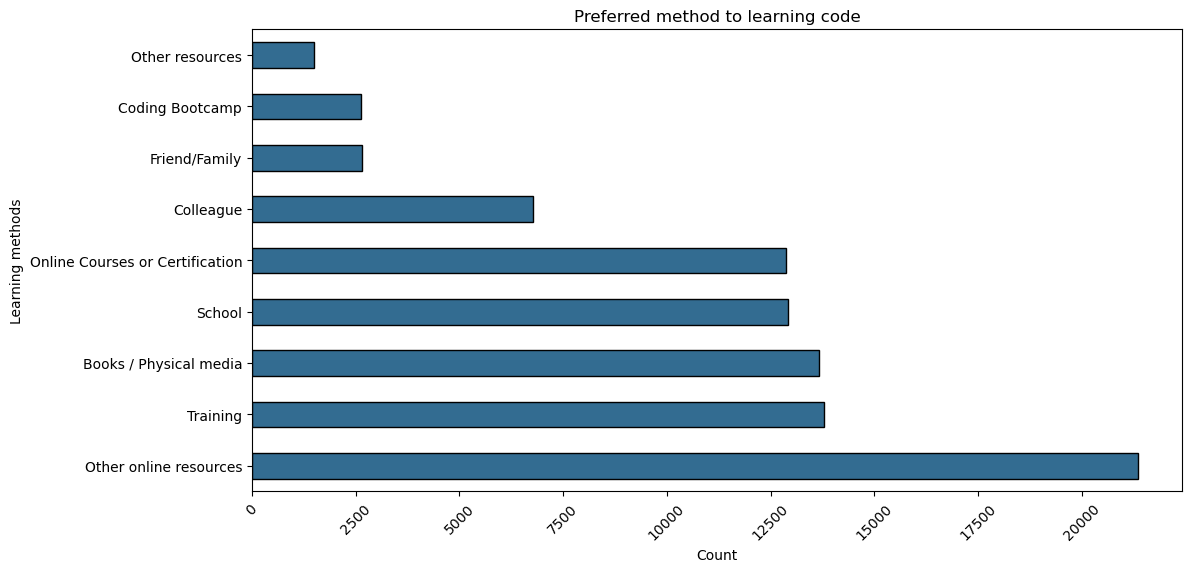

In [655]:
lean_co.plot(kind='barh', figsize=(12,6), color='#336c91', edgecolor='black')
plt.title('Preferred method to learning code')
plt.xlabel('Count')
plt.ylabel('Learning methods')
plt.xticks(rotation=45)
plt.show()

## Remote Work Questions :

### this will drop the nulls in worktype,sat

In [562]:
df['RemoteWork'] = df['RemoteWork'].replace('Hybrid (some remote, some in-person)', 'Hybrid')

In [563]:
df=df.dropna(subset=('RemoteWork'))
df['RemoteWork'].sample(10)

31864       Hybrid
23778       Hybrid
45803       Remote
13337       Remote
19364       Hybrid
48547       Hybrid
37697    In-person
48606       Remote
10001       Remote
31164       Remote
Name: RemoteWork, dtype: object

In [564]:
dfSat=df.dropna(subset=(['JobSat','RemoteWork']))

### How much people in each type of work

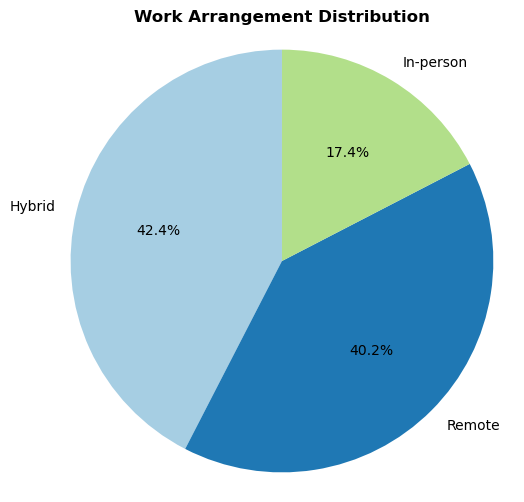

In [625]:
# Calculate percentages
remote_percent = df['RemoteWork'].value_counts(normalize=True) * 100

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    remote_percent,
    labels=remote_percent.index,
    autopct='%1.1f%%',      # format percentages
    startangle=90,       
    colors=plt.cm.Paired.colors
)

plt.title('Work Arrangement Distribution', weight='bold')
plt.axis('equal') 
plt.show()


### 1-How does job satisfaction differ among hybrid, remote, and in-person developers?

In [566]:
avgSat=dfSat.groupby('RemoteWork')['JobSat'].mean().sort_values(ascending=False)
avgSat

RemoteWork
Remote       7.021239
Hybrid       6.932765
In-person    6.699808
Name: JobSat, dtype: float64

In [567]:
avgSatC =(
    dfSat.groupby(['RemoteWork','Country'])['JobSat'].mean().sort_values(ascending=False))
avgSatC

RemoteWork  Country    
Hybrid      Ukraine        7.418410
Remote      Brazil         7.390830
In-person   Netherlands    7.336283
Remote      Canada         7.253012
            Ukraine        7.234742
Hybrid      Canada         7.165192
Remote      Netherlands    7.164557
Hybrid      Netherlands    7.102450
Remote      India          7.011521
            USA            6.988682
Hybrid      USA            6.984566
            France         6.947559
Remote      France         6.945652
Hybrid      Poland         6.938849
            India          6.913212
In-person   Poland         6.904110
            France         6.897727
            UK             6.867089
Remote      Poland         6.854599
            UK             6.817610
Hybrid      Germany        6.809233
In-person   USA            6.791165
Hybrid      UK             6.743590
Remote      Germany        6.739726
In-person   Germany        6.737705
Hybrid      Brazil         6.720207
In-person   Brazil         6.650943
    

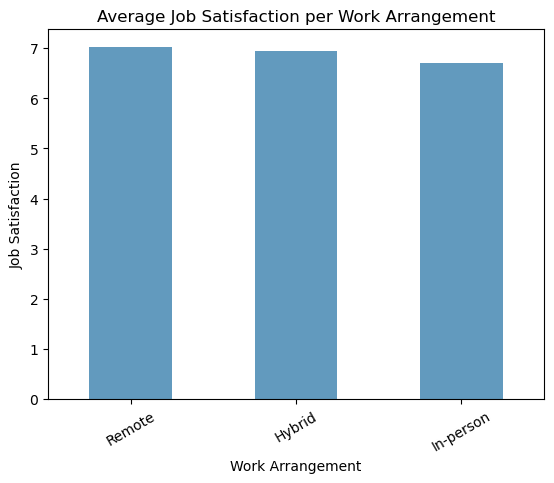

In [568]:
avgSat.plot(kind='bar', color='#629abe')
plt.title('Average Job Satisfaction per Work Arrangement')
plt.xlabel('Work Arrangement')
plt.ylabel('Job Satisfaction')
plt.xticks( rotation=30)
plt.show()

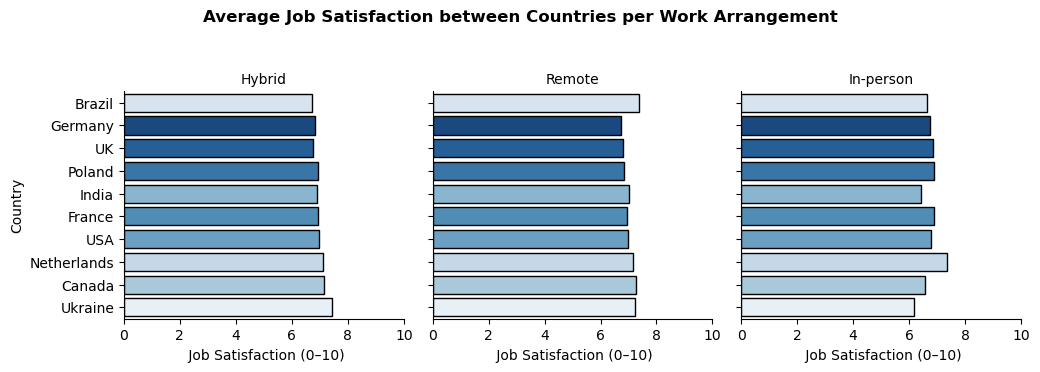

In [569]:


dfb = avgSatC.reset_index(name='JobSat')

g = sns.catplot(
    data=dfb, x='JobSat', y='Country', col='RemoteWork',hue='Country',
    kind='bar', height=3.5, aspect=1.0, palette='Blues',
    edgecolor='black', order=dfb.groupby('Country')['JobSat'].median().sort_values().index
)
g.set(xlim=(0,10), xlabel=' Job Satisfaction (0–10)', ylabel='Country')
g.set_titles('{col_name}')
g.fig.suptitle('Average Job Satisfaction between Countries per Work Arrangement', weight='bold', y=1.05)
plt.tight_layout(); plt.show()



### 2-Which work arrangement — hybrid, remote, or in-person — has the highest average salary?


In [636]:
avgSal=df.groupby('RemoteWork')['ConvertedCompYearly'].median()#agg(['mean','median','max','min'])
avgSal

RemoteWork
Hybrid       75184.0
In-person    59844.5
Remote       90000.0
Name: ConvertedCompYearly, dtype: float64

In [638]:
avgSalC =df.groupby(['RemoteWork','Country'])['ConvertedCompYearly'].median().sort_values(ascending=False).groupby(level=0).head(10)
avgSalC

RemoteWork  Country    
Remote      USA            157000.0
Hybrid      USA            148235.0
In-person   USA            125000.0
Remote      UK              90445.0
            Canada          90139.0
Hybrid      UK              87898.0
            Canada          87231.0
Remote      Netherlands     82702.5
            Germany         75184.0
Hybrid      Germany         73036.0
In-person   Canada          70512.0
Hybrid      Netherlands     67021.0
In-person   UK              66242.0
Remote      France          65518.0
In-person   Germany         64444.0
            Netherlands     57999.0
Remote      Poland          55432.0
Hybrid      Poland          54937.0
            France          53703.0
In-person   France          48333.0
            Poland          47972.5
Remote      Ukraine         29621.0
            Brazil          29465.0
Hybrid      India           24680.5
            Ukraine         23697.0
            Brazil          23274.0
Remote      India           22731.0
In-p

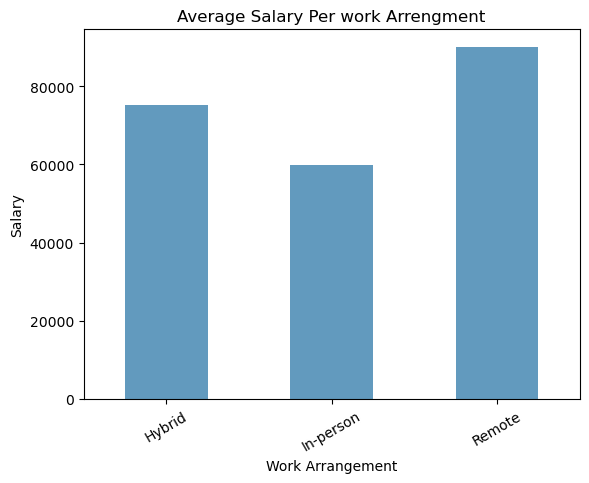

In [637]:
avgSal.plot(kind='bar', color='#629abe')
plt.title('Average Salary Per work Arrengment')
plt.xlabel('Work Arrangement')
plt.ylabel('Salary')
plt.xticks( rotation=30)
plt.show()

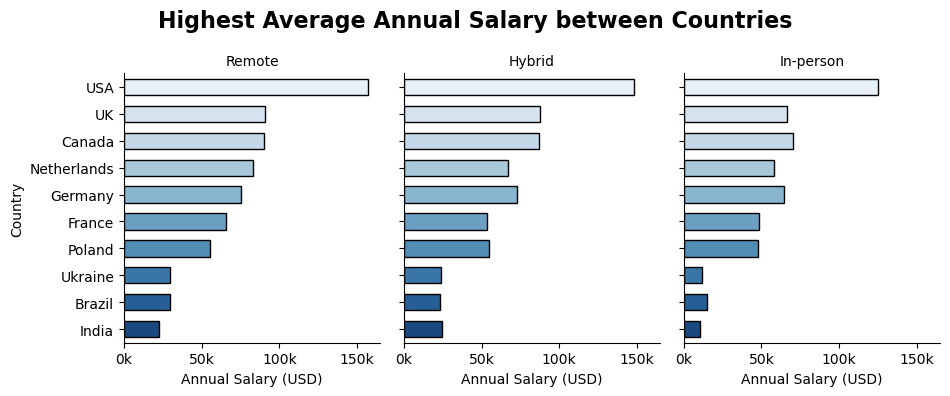

In [642]:
df_long = avgSalC.reset_index(name='Salary')
df_long['Salary'] = df_long['Salary'] / 1000 

g = sns.catplot( data=df_long, x='Salary', y='Country', col='RemoteWork',kind='bar', height=4, aspect=0.8,palette='Blues', edgecolor='black', hue='Country', width=0.6 )

g.set_titles("{col_name}")
g.set_xlabels("Annual Salary (USD)")
g.set_ylabels("Country")
for i in g.axes.flat:
    i.xaxis.set_major_formatter(mt.StrMethodFormatter("{x:,.0f}k"))
plt.suptitle("Highest Average Annual Salary between Countries", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


### 3-Which work arrangement is most likely to use AI tools?

In [574]:
df['AI_User'] = df['AIToolCurrently Using'].notna()
aiPer= df.groupby('RemoteWork')['AI_User'].mean().sort_values(ascending=False) *100
aiPer

RemoteWork
Remote       58.878505
Hybrid       54.910634
In-person    51.232394
Name: AI_User, dtype: float64

In [575]:
ai_CPer= df.groupby(['RemoteWork','Country'])['AI_User'].mean().sort_values(ascending=False).groupby(level=0).head(10) *100
ai_CPer

RemoteWork  Country    
Hybrid      Ukraine        68.736142
Remote      Ukraine        67.149440
            India          66.192733
In-person   Ukraine        65.714286
Remote      Brazil         64.918033
Hybrid      Brazil         63.157895
In-person   India          62.019231
            Brazil         61.878453
Remote      Poland         61.553398
            Canada         61.219196
            Netherlands    60.330579
Hybrid      Poland         60.246914
            Netherlands    58.894879
Remote      Germany        57.098446
Hybrid      India          56.261343
In-person   Netherlands    55.605381
Hybrid      Germany        55.247181
Remote      USA            55.228206
In-person   Poland         55.000000
            Canada         54.672897
Remote      UK             52.807775
Hybrid      France         52.771855
            USA            52.693824
Remote      France         52.631579
Hybrid      Canada         52.461800
            UK             50.164474
In-person   Ge

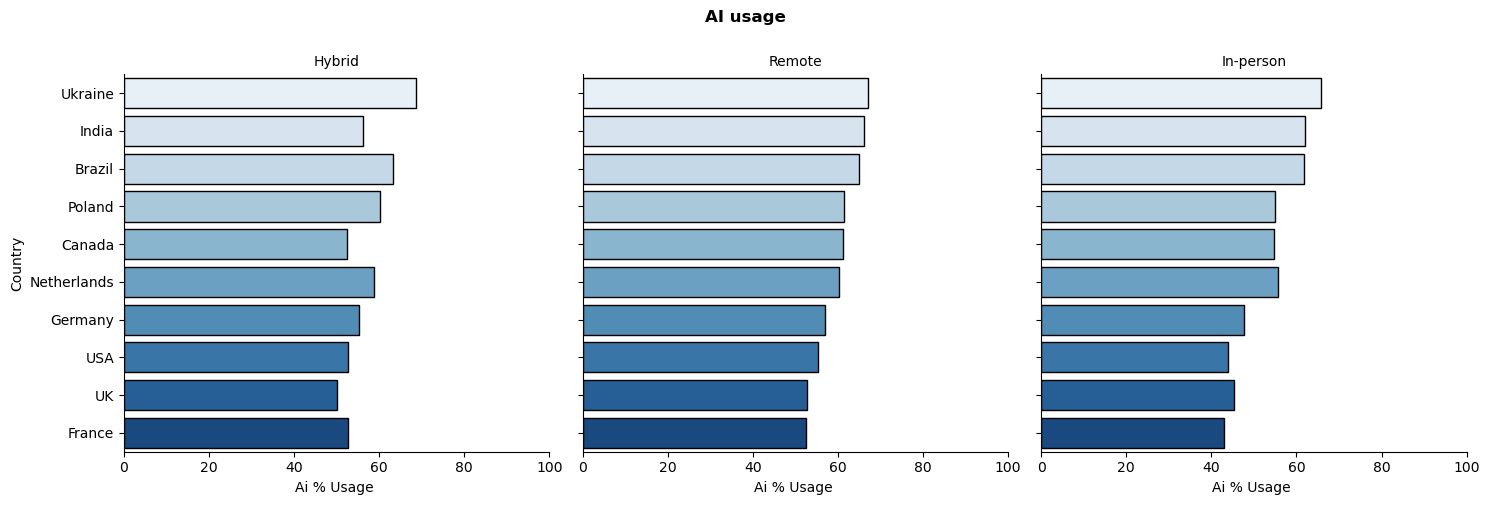

In [645]:
dfa = ai_CPer.reset_index()
g = sns.catplot(
    data=dfa, x='AI_User', y='Country', col='RemoteWork',hue='Country',
    kind='bar', palette='Blues', edgecolor='black'
)
g.set(xlim=(0,100), xlabel='Ai % Usage ', ylabel='Country')
g.set_titles('{col_name}')

g.fig.suptitle('AI usage', weight='bold', y=1)
plt.tight_layout()
plt.show()

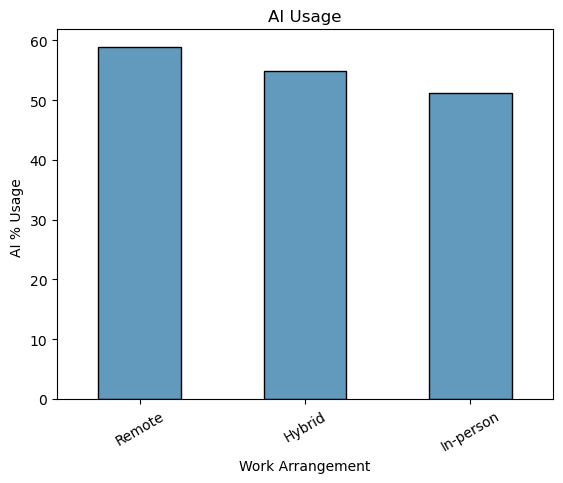

In [646]:

aiPer.plot(kind='bar', color='#629abe', edgecolor='black')
plt.title('AI Usage')
plt.xlabel('Work Arrangement')
plt.ylabel('AI % Usage ')
plt.xticks( rotation=30)
plt.show()

### 4- Do developers’ preferred programming languages/databases vary by work arrangement?

In [578]:
lan = (
    df.dropna(subset=['LanguageAdmired']).assign(Language=df['LanguageAdmired'].str.split(';')).explode('Language')
)

dbase = (
    df.dropna(subset=['DatabaseAdmired']).assign(DataBase=df['DatabaseAdmired'].str.split(';')).explode('DataBase')
)

In [579]:
top3_lan=lan['Language'].value_counts(ascending=False).head(5)
top3_lan

Language
SQL           9221
JavaScript    9072
Python        8931
HTML/CSS      8007
TypeScript    7119
Name: count, dtype: int64

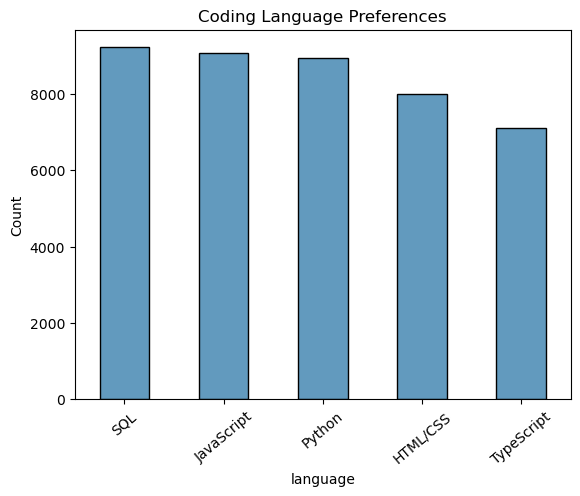

In [647]:

top3_lan.plot(kind='bar', color='#629abe', edgecolor='black')
plt.title('Coding Language Preferences')
plt.xlabel('language')
plt.ylabel('Count')
plt.xticks( rotation=40)
plt.show()

In [581]:
top3_Wlan=lan.groupby('RemoteWork')['Language'].value_counts(ascending=False).groupby(level=0).head(5)#.reset_index(name='Count')
top3_Wlan

RemoteWork  Language               
Hybrid      Python                     4134
            SQL                        3909
            JavaScript                 3714
            HTML/CSS                   3303
            TypeScript                 3025
In-person   Python                     1686
            JavaScript                 1568
            SQL                        1501
            HTML/CSS                   1430
            Bash/Shell (all shells)     961
Remote      SQL                        3811
            JavaScript                 3790
            HTML/CSS                   3274
            TypeScript                 3165
            Python                     3111
Name: count, dtype: int64

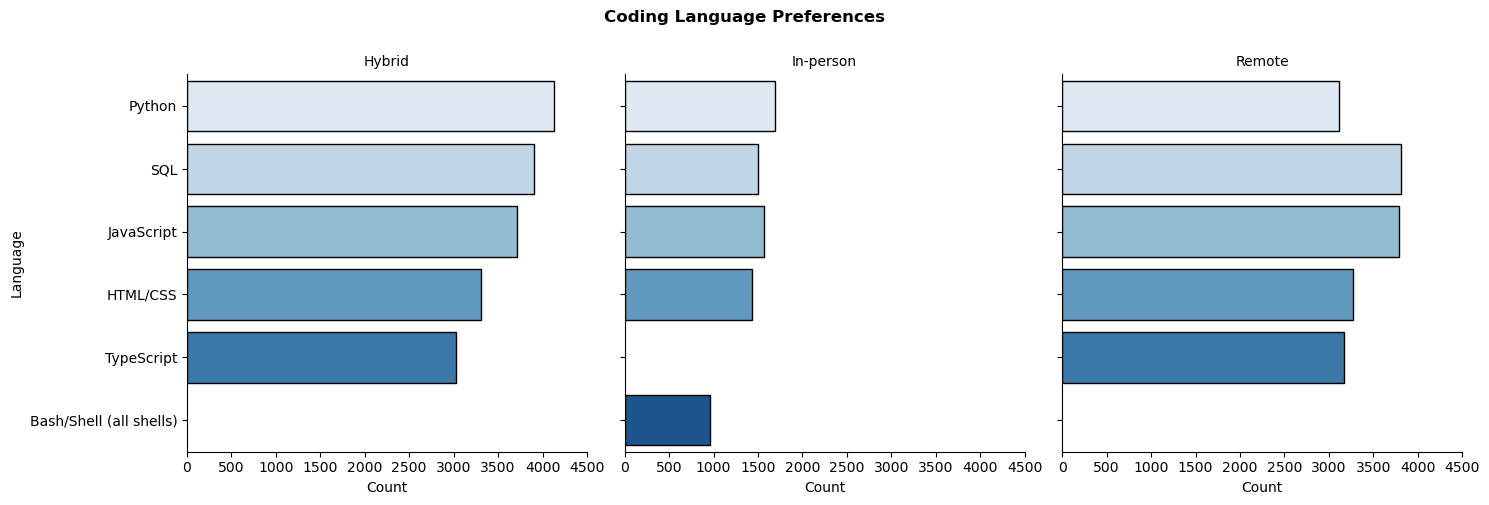

In [582]:

dfl = top3_Wlan.reset_index(name='Count')
g = sns.catplot(
    data=dfl, x='Count', y='Language', col='RemoteWork',hue='Language',
    kind='bar', palette='Blues', edgecolor='black'
)
g.set(xlim=(0,4500), xlabel='Count', ylabel='Language')
g.set_titles('{col_name}')

g.fig.suptitle('Coding Language Preferences', weight='bold', y=1)
plt.tight_layout()
plt.show()

In [583]:
top3_db=dbase['DataBase'].value_counts(ascending=False).head(5)
top3_db

DataBase
PostgreSQL              8491
SQLite                  4439
MySQL                   4297
Microsoft SQL Server    3464
Redis                   3276
Name: count, dtype: int64

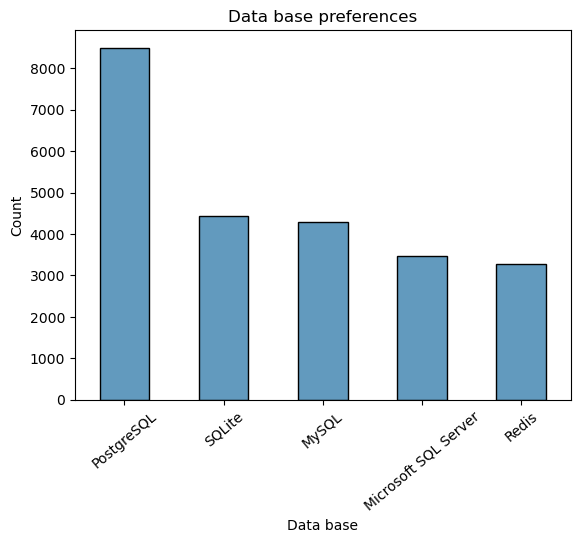

In [648]:

top3_db.plot(kind='bar', color='#629abe', edgecolor='black')
plt.title('Data base preferences')
plt.xlabel('Data base')
plt.ylabel('Count')
plt.xticks( rotation=40)
plt.show()

In [585]:
top3_Wdb=dbase.groupby('RemoteWork')['DataBase'].value_counts(ascending=False).groupby(level=0).head(5)
top3_Wdb

RemoteWork  DataBase            
Hybrid      PostgreSQL              3449
            SQLite                  1963
            MySQL                   1709
            Microsoft SQL Server    1502
            Redis                   1249
In-person   PostgreSQL              1113
            MySQL                    927
            SQLite                   785
            Microsoft SQL Server     595
            MongoDB                  553
Remote      PostgreSQL              3929
            SQLite                  1691
            Redis                   1670
            MySQL                   1661
            Microsoft SQL Server    1367
Name: count, dtype: int64

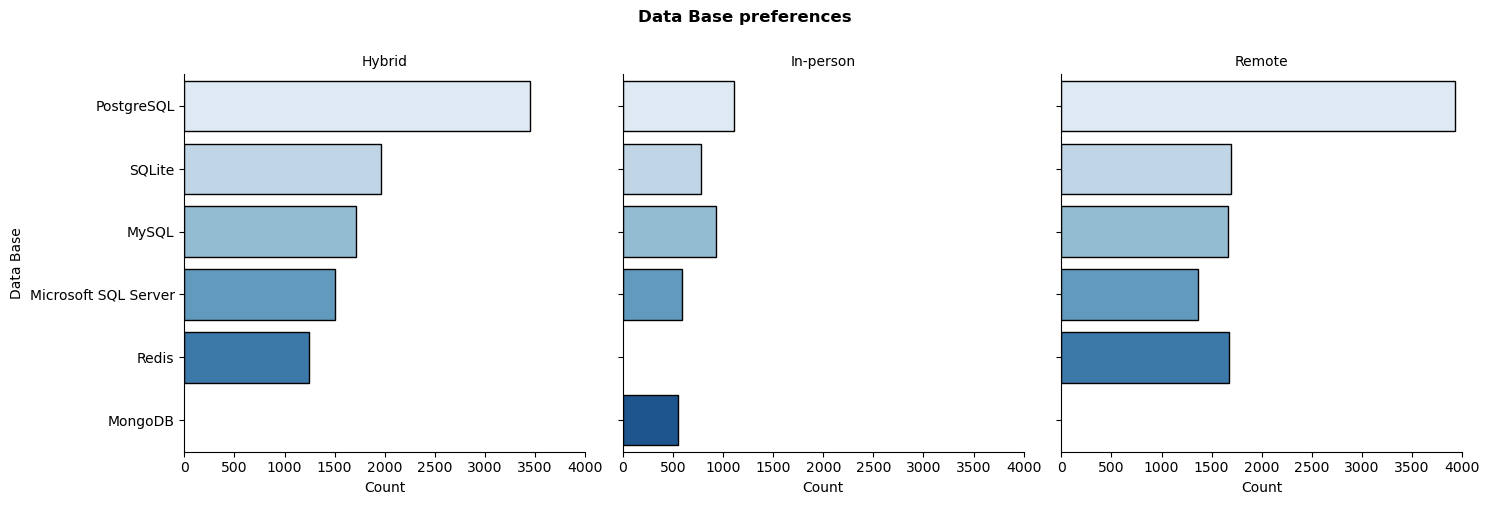

In [586]:

dfd = top3_Wdb.reset_index(name='Count')
g = sns.catplot(
    data=dfd, x='Count', y='DataBase', col='RemoteWork',hue='DataBase',
    kind='bar', palette='Blues', edgecolor='black'
)
g.set(xlim=(0,4000), xlabel='Count', ylabel='Data Base')
g.set_titles('{col_name}')

g.fig.suptitle('Data Base preferences', weight='bold', y=1)
plt.tight_layout()
plt.show()

## Ai Questions:

## 1. Do developers who use AI tools earn more than those who don’t?

In [587]:
df['UsesAITools'] = df['AIToolCurrently Using'].notna() & (df['AIToolCurrently Using'].str.strip() != '')
df_salary = df.dropna(subset=['ConvertedCompYearly', 'UsesAITools'])
salary_means = df_salary.groupby('UsesAITools')['ConvertedCompYearly'].mean()
print("Average salary by AI tool usage:")
print(salary_means)

Average salary by AI tool usage:
UsesAITools
False    96723.692702
True     87655.208330
Name: ConvertedCompYearly, dtype: float64


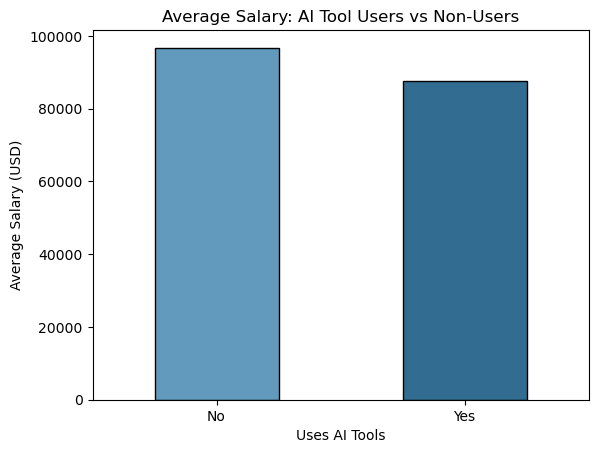

In [649]:

salary_means.plot(kind='bar',color=['#629abe', '#336c91'], edgecolor='black')
plt.title('Average Salary: AI Tool Users vs Non-Users')
plt.xlabel('Uses AI Tools')
plt.ylabel('Average Salary (USD)')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()

## 2. Compare average salary between AI users and non-users in the top 10 countries

In [589]:
salary_country_ai = df.groupby(['Country', 'UsesAITools'])['ConvertedCompYearly'].mean().unstack()
salary_country_ai
print("Average salary by country and AI tool usage:")
print(salary_country_ai)

Average salary by country and AI tool usage:
UsesAITools          False          True 
Country                                  
Brazil        57688.689433   31922.760901
Canada        92035.043639   93648.677060
France        62403.044516   58478.950882
Germany       75256.089447   71495.746114
India         24730.158570   22693.307304
Netherlands   75089.859513   71924.343060
Poland        59811.707022   53648.838915
UK            90645.659884   96336.821979
USA          153415.367395  153681.199889
Ukraine       41642.298077   32597.279485


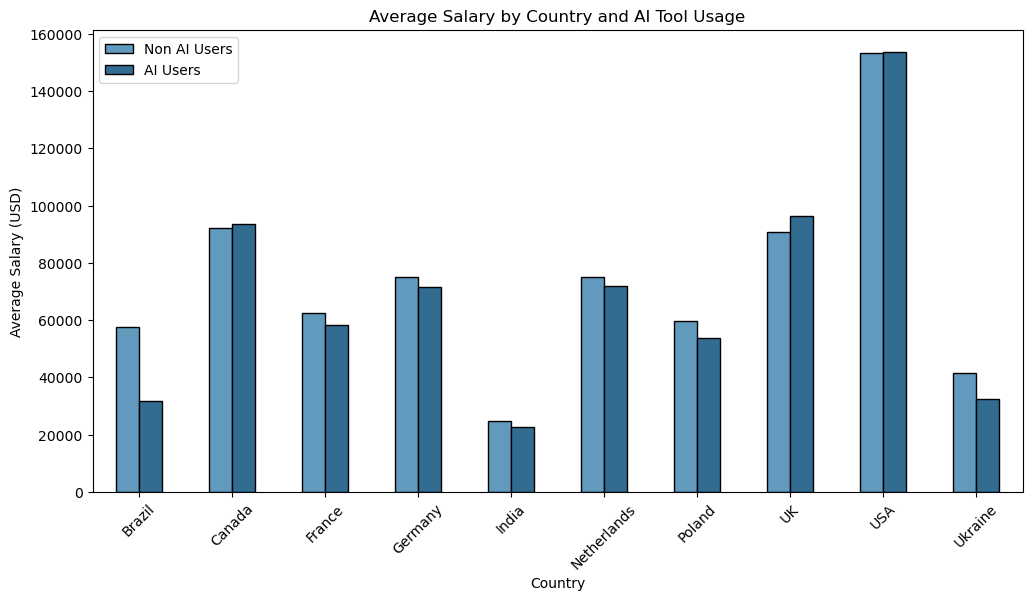

In [650]:
salary_country_ai.plot(kind='bar', figsize=(12,6), color=['#629abe','#336c91'], edgecolor='black')
plt.title('Average Salary by Country and AI Tool Usage')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.legend(['Non AI Users', 'AI Users'])
plt.show()

## 3. Are AI tool users more satisfied with their jobs than non-users?

In [591]:
df_job_sat = df.dropna(subset=['JobSat', 'UsesAITools']).copy()
df_job_sat['JobSat'] = pd.to_numeric(df_job_sat['JobSat'], errors='coerce')
df_job_sat = df_job_sat.dropna(subset=['JobSat'])
job_sat_means = df_job_sat.groupby('UsesAITools')['JobSat'].mean()
print("Average job satisfaction by AI tool usage:")
print(job_sat_means)

Average job satisfaction by AI tool usage:
UsesAITools
False    6.849651
True     6.993061
Name: JobSat, dtype: float64


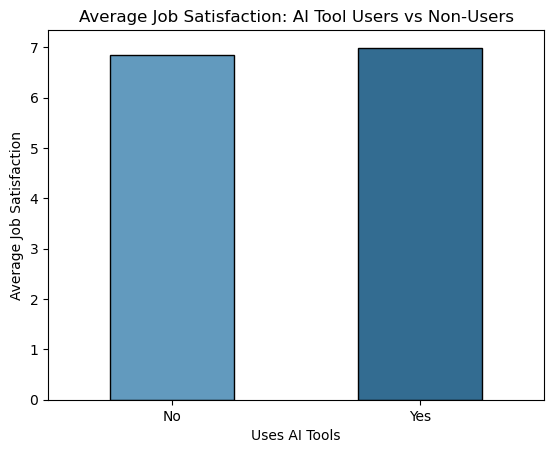

In [651]:
job_sat_means.plot(kind='bar', color=['#629abe', '#336c91'], edgecolor='black')
plt.title('Average Job Satisfaction: AI Tool Users vs Non-Users')
plt.xlabel('Uses AI Tools')
plt.ylabel('Average Job Satisfaction')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()

### 4. Which country has the highest percentage of AI tool users among the top 10 countries?

In [593]:
counts = df.groupby(['Country', 'UsesAITools']).size().unstack(fill_value=0)
counts['PercentAIUsers'] = counts[True] / (counts[True] + counts[False]) * 100
counts_sorted = counts.sort_values(by='PercentAIUsers', ascending=False)
print("Percentage of AI tool users by country:")
print(counts_sorted[['PercentAIUsers']])

Percentage of AI tool users by country:
UsesAITools  PercentAIUsers
Country                    
Ukraine           67.421687
Brazil            63.940520
India             60.684685
Poland            60.288462
Netherlands       58.379374
Canada            57.052097
Germany           54.505777
USA               52.499709
France            50.605481
UK                50.594994


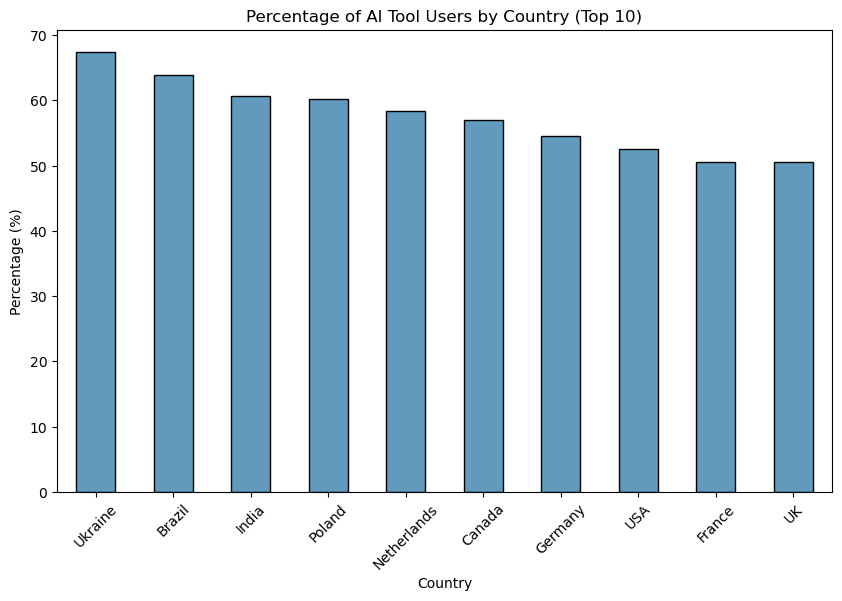

In [654]:
counts_sorted['PercentAIUsers'].plot(kind='bar', color='#629abe', figsize=(10,6), edgecolor='black')
plt.title('Percentage of AI Tool Users by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()